Student: Maxime Corlay (2024-25)

There is also a pdf file (for exercise 3)

**Exercise 1**



In [63]:
from math import cos, sqrt, log, pi, exp # source: https://docs.python.org/fr/3.5/library/math.html
from random import random, randint # source: https://docs.python.org/fr/3/library/random.html
from statsmodels.tsa.stattools import acf # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm, multivariate_normal # source: https://docs.scipy.org/doc/scipy/reference/stats.html
import numpy as np

**Part A**

[Q1]

In [64]:
def sample_P1(sigma1):
  # I use Box-Muller (see TP1)
  u1=1-random() # we want u1 in ]0,1] but random() generates in [0,1[, hence the idea to write 1-random()
  u2=1-random()
  return sigma1*sqrt(-2*log(u1))*cos(2*pi*u2),0   # I use TP1 and the formula that if X~N(0,1) then sigma*X~N(0,sigma**2)

def sample_P2(sigma2):
  # I use Box-Muller (see TP1)
  u1=1-random() # we want u1 in ]0,1] but random() generates in [0,1[, hence the idea to write 1-random()
  u2=1-random()
  return 0,sigma2*sqrt(-2*log(u1))*cos(2*pi*u2)   # I use TP1 and the formula that if X~N(0,1) then sigma*X~N(0,sigma**2)

def f(z,a):
  '''
  f(z) is proportional to pi(z) (the proportional constant being the normalization constant)
  '''
  x,y=z
  return exp(-x**2/a**2-y**2-0.25*(x**2/a**2-y**2)**2)

def alpha(z_new,z,a):
  '''
  output : pi(z_new)/pi(z)
  '''
  return f(z_new,a)/(f(z,a)+1e-100) # I added 1e-100 to ensure numerical stability

def alpha(z_new,z,a):
  '''
  output : pi(z_new)/pi(z)
  '''
  return min(f(z_new,a)/(f(z,a)+1e-100),1)



def markov_chain_P(n,x_0,y_0,sigma1,sigma2,a):
  '''
  output : numpy array of size (n,2)
  '''
  chain=np.zeros((n,2))
  chain[0][0],chain[0][1]=x_0,y_0
  for k in range(1,n): # Metropolis-Hastings loop
    c=randint(0,1) # c for "coordinate" updated
    if c==0: # x is updated
      dx,dy=sample_P1(sigma1)
    else: # y is updated
      dx,dy=sample_P2(sigma2)
    z=chain[k-1][0],chain[k-1][1]
    z_new=chain[k-1][0]+dx,chain[k-1][1]+dy
    _alpha=alpha(z_new,z,a)
    u=random() # aleatoric threshold
    if u<=_alpha: # accept
      chain[k][0],chain[k][1]=z_new
    else: # reject
      chain[k][0],chain[k][1]=z
  return chain

[Q2]

In [65]:
print(markov_chain_P(10,0,0,3,3,10))

[[ 0.          0.        ]
 [ 1.40350093  0.        ]
 [ 1.01231161  0.        ]
 [-4.05286275  0.        ]
 [-3.40076063  0.        ]
 [-3.40076063  0.        ]
 [ 1.86294912  0.        ]
 [ 3.19566309  0.        ]
 [ 7.77651458  0.        ]
 [ 7.55102471  0.        ]]


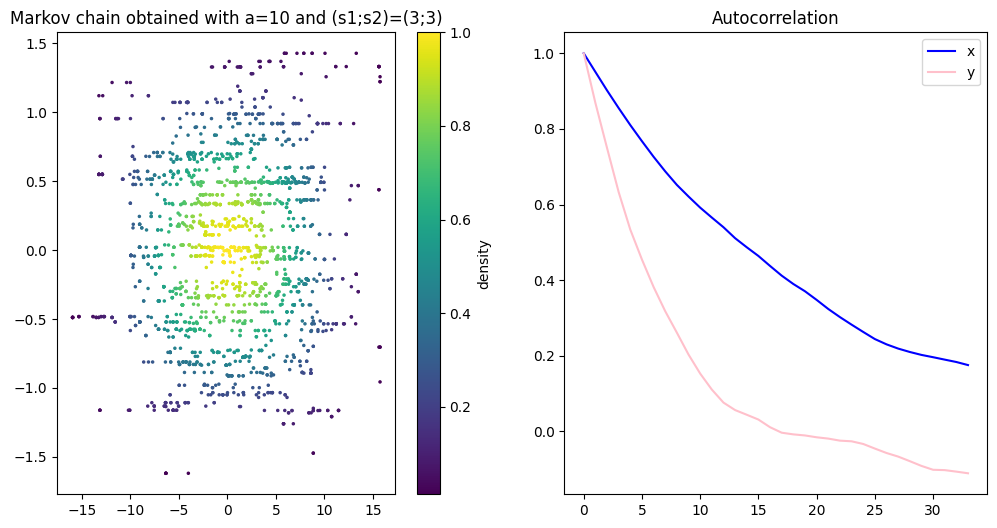

In [66]:
def f_numpy(x,y,a):  # numpy version of f function
    return np.exp(-x**2/a**2-y**2-0.25*(x**2/a**2-y**2)**2)

n=2000
sigma1=3
sigma2=3
a=10
chain=markov_chain_P(n,0,0,sigma1,sigma2,a)
densities=f_numpy(chain[:,0],chain[:,1],a)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=2.3) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with a=10 and (s1;s2)=({sigma1};{sigma2})')
ax2.plot(acf(chain[:,0]),color="blue",label='x')
ax2.plot(acf(chain[:,1]),color="pink",label='y')
ax2.legend()
ax2.set_title("Autocorrelation")
plt.show()

[Q3]
First thing we can do: change the probability to choose coordinate x or y. Because for the moment that probability is 0.5.

In [67]:
def markov_chain_P_proba(probab,n,x_0,y_0,sigma1,sigma2,a):
  '''
  output : numpy array of size (n,2)
  '''
  chain=np.zeros((n,2))
  chain[0][0],chain[0][1]=x_0,y_0
  for k in range(1,n): # Metropolis-Hastings loop
    c=random() # I replaced randint(0,1) by random() to allow any value in ]0,1]
    if c<=probab: # x is updated
      dx,dy=sample_P1(sigma1)
    else: # y is updated
      dx,dy=sample_P2(sigma2)
    z=chain[k-1][0],chain[k-1][1]
    z_new=chain[k-1][0]+dx,chain[k-1][1]+dy
    _alpha=alpha(z_new,z,a)
    u=random() # aleatoric threshold
    if u<=_alpha: # accept
      chain[k][0],chain[k][1]=z_new
    else: # reject
      chain[k][0],chain[k][1]=z
  return chain

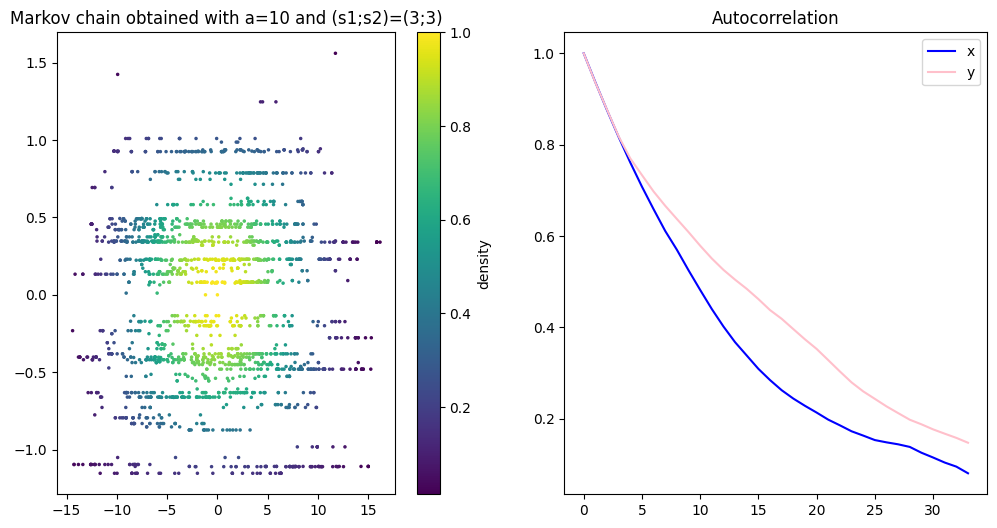

In [68]:
n=2000
sigma1=3
sigma2=3
a=10
chain=markov_chain_P_proba(0.8,n,0,0,sigma1,sigma2,a)
densities=f_numpy(chain[:,0],chain[:,1],a)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=2.3) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with a=10 and (s1;s2)=({sigma1};{sigma2})')
ax2.plot(acf(chain[:,0]),color="blue",label='x')
ax2.plot(acf(chain[:,1]),color="pink",label='y')
ax2.legend()
ax2.set_title("Autocorrelation")
plt.show()

Remark: when probab increases, it means x is accepted more frequently so obviously it updates more frequently the value of x: as a result, the Autocorrelation curve of x improves (meaning that for each value of lag, the corresponding autocorrelation decreases when probab increases). Meanwhile, when probab increases, for each value of lag we observe that the corresponding value of y-autocorrelation increases. I obtain roughly similar curves for x and y when probab=0.8. When probab<0.8, x-curve is above y-curve. When probab>0.8, it is the contrary.

Let us see what happens if we reduce both sigma.

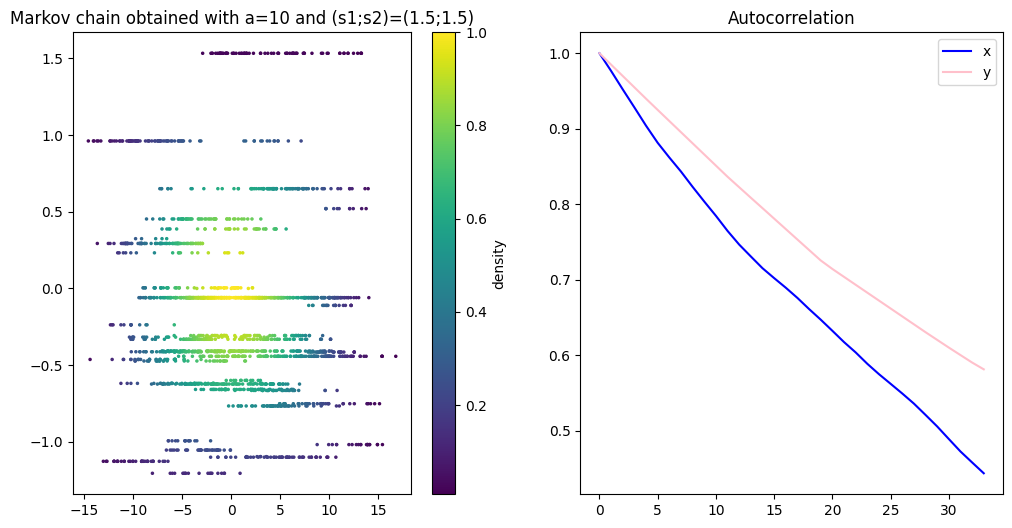

In [69]:
n=2000
sigma1=1.5
sigma2=1.5
a=10
chain=markov_chain_P_proba(0.96,n,0,0,sigma1,sigma2,a)
densities=f_numpy(chain[:,0],chain[:,1],a)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=2.3) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with a=10 and (s1;s2)=({sigma1};{sigma2})')
ax2.plot(acf(chain[:,0]),color="blue",label='x')
ax2.plot(acf(chain[:,1]),color="pink",label='y')
ax2.legend()
ax2.set_title("Autocorrelation")
plt.show()

We remark that probab threshold is now around 0.96 (for sigma1=sigma2=1.5). Now we see that we have two ways to improve the sampling: trying to modify the sigmas and/or the probab threshold.

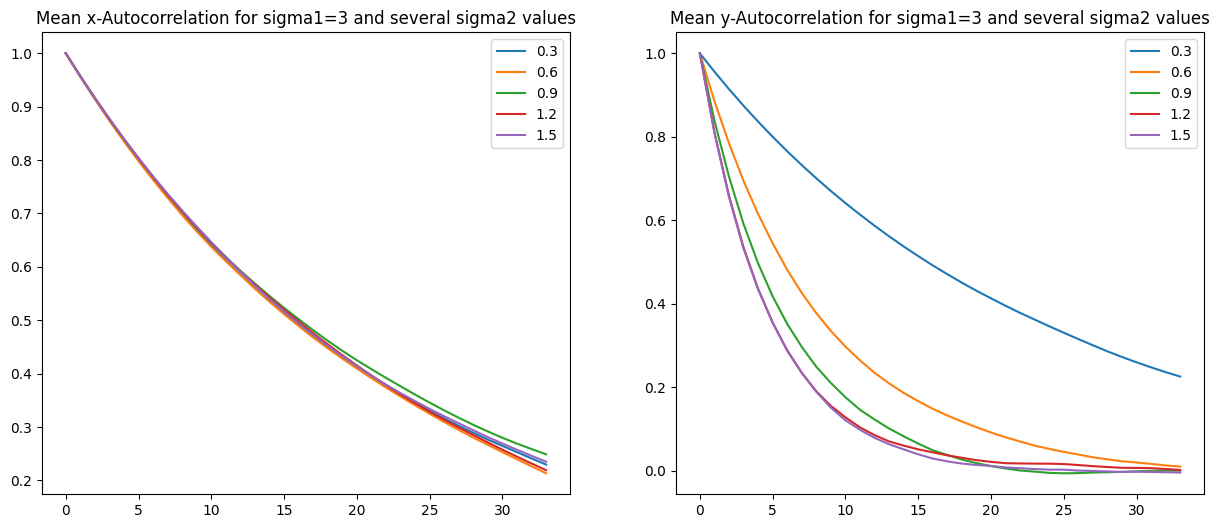

In [70]:
n=2000
a=10
chains1=np.zeros((50,2000,2))
chains2=np.zeros((50,2000,2))
chains3=np.zeros((50,2000,2))
chains4=np.zeros((50,2000,2))
chains5=np.zeros((50,2000,2))
for k in range(50):
  chains1[k]=markov_chain_P_proba(0.5,n,0,0,3,0.3,a)
  chains2[k]=markov_chain_P_proba(0.5,n,0,0,3,0.6,a)
  chains3[k]=markov_chain_P_proba(0.5,n,0,0,3,0.9,a)
  chains4[k]=markov_chain_P_proba(0.5,n,0,0,3,1.2,a)
  chains5[k]=markov_chain_P_proba(0.5,n,0,0,3,1.5,a)

# statistics
'''
We want to do the following computation (but it is not proper code):
x_acf_chain1_moy[lag,0]=mean(acf(chains1[k][:,0])[lag] over k in 50)
'''
mean_acf_chain1=np.apply_along_axis(np.mean,axis=0,arr=np.apply_along_axis(acf,axis=1,arr=chains1))
mean_acf_chain2=np.apply_along_axis(np.mean,axis=0,arr=np.apply_along_axis(acf,axis=1,arr=chains2))
mean_acf_chain3=np.apply_along_axis(np.mean,axis=0,arr=np.apply_along_axis(acf,axis=1,arr=chains3))
mean_acf_chain4=np.apply_along_axis(np.mean,axis=0,arr=np.apply_along_axis(acf,axis=1,arr=chains4))
mean_acf_chain5=np.apply_along_axis(np.mean,axis=0,arr=np.apply_along_axis(acf,axis=1,arr=chains5))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
ax1.plot(mean_acf_chain1[:,0],label='0.3')
ax1.plot(mean_acf_chain2[:,0],label='0.6')
ax1.plot(mean_acf_chain3[:,0],label='0.9')
ax1.plot(mean_acf_chain4[:,0],label='1.2')
ax1.plot(mean_acf_chain5[:,0],label='1.5')
ax1.legend()
ax1.set_title("Mean x-Autocorrelation for sigma1=3 and several sigma2 values")
ax2.plot(mean_acf_chain1[:,1],label='0.3')
ax2.plot(mean_acf_chain2[:,1],label='0.6')
ax2.plot(mean_acf_chain3[:,1],label='0.9')
ax2.plot(mean_acf_chain4[:,1],label='1.2')
ax2.plot(mean_acf_chain5[:,1],label='1.5')
ax2.legend()
ax2.set_title("Mean y-Autocorrelation for sigma1=3 and several sigma2 values")
plt.show()

We can do better by putting all chains_i in the same array. Let's do that, and let's add standard deviation.

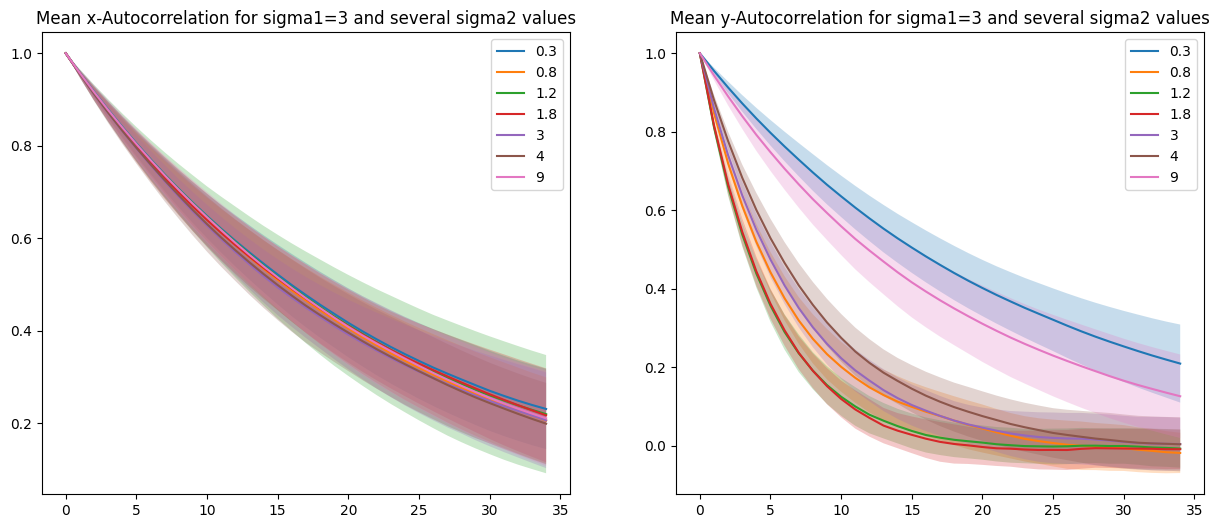

In [71]:
n=2000
a=10
sigma1=3
sigma2=[0.3,0.8,1.2,1.8,3,4,9]
chains=np.zeros((len(sigma2),50,2000,2))
for l in range(len(sigma2)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.5,n,0,0,sigma1,sigma2[l],a)

# statistics
'''
nlags changes so I fix nlags at value 34
The problem with this choice is that it is the second argument
So I add "lambda x: acf(x,nlags=34)" to make the system understand that arr=chains refers to x
'''
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma2)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma2[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for sigma1={sigma1} and several sigma2 values")
for l in range(len(sigma2)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma2[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for sigma1={sigma1} and several sigma2 values")
plt.show()

There are many things to say here:
* I observe that when sigma1 is fixed and sigma2 moves, statistically the curve of x-autocorrelation stays the same.
* I observe a phenomenon of **rebound**: when sigma2 is small, make sigma2 increase and the y-autocorr globally decreases (so it improves). But when it reaches a critical value (around sigma2=1.5), then y-autocorr begins to globally increase (as a function of sigma2).

The situation isn't symmetric due to $a=10$ so let's take a look at what happens if we intervert x and y.

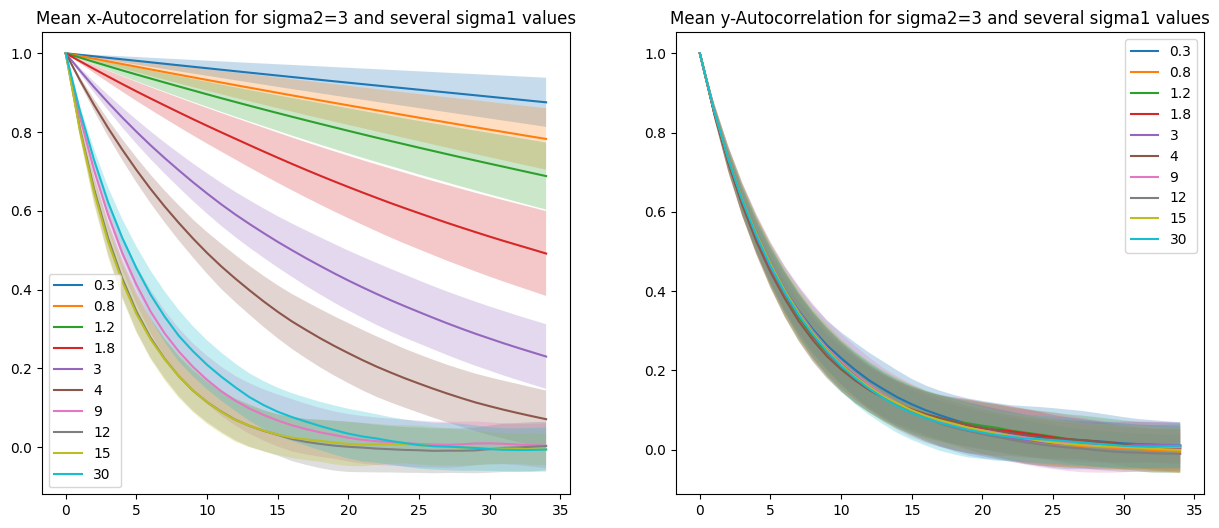

In [72]:
n=2000
a=10
sigma1=[0.3,0.8,1.2,1.8,3,4,9,12,15,30]
sigma2=3
chains=np.zeros((len(sigma1),50,2000,2))
for l in range(len(sigma1)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.5,n,0,0,sigma1[l],sigma2,a)

# statistics
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma1)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma1[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for sigma2={sigma2} and several sigma1 values")
for l in range(len(sigma1)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma1[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for sigma2={sigma2} and several sigma1 values")
plt.show()

We observe the same phenomenon of rebound, but this time, the rebound happens approximately for sigma1=15.

This raises some very interesting questions: does the rebound value depend on sigma2? Does it depend on the probab threshold?

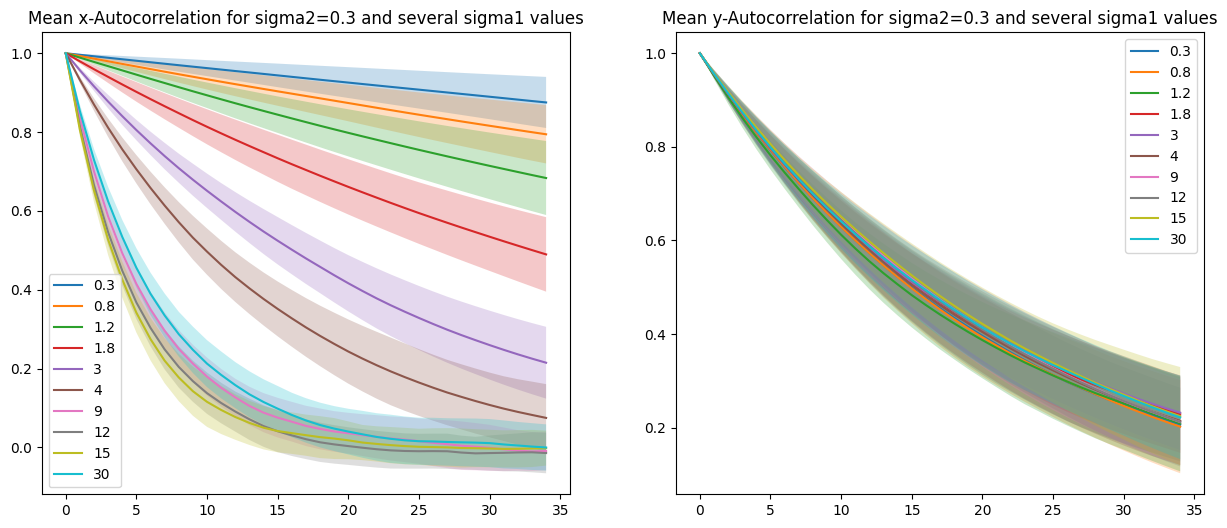

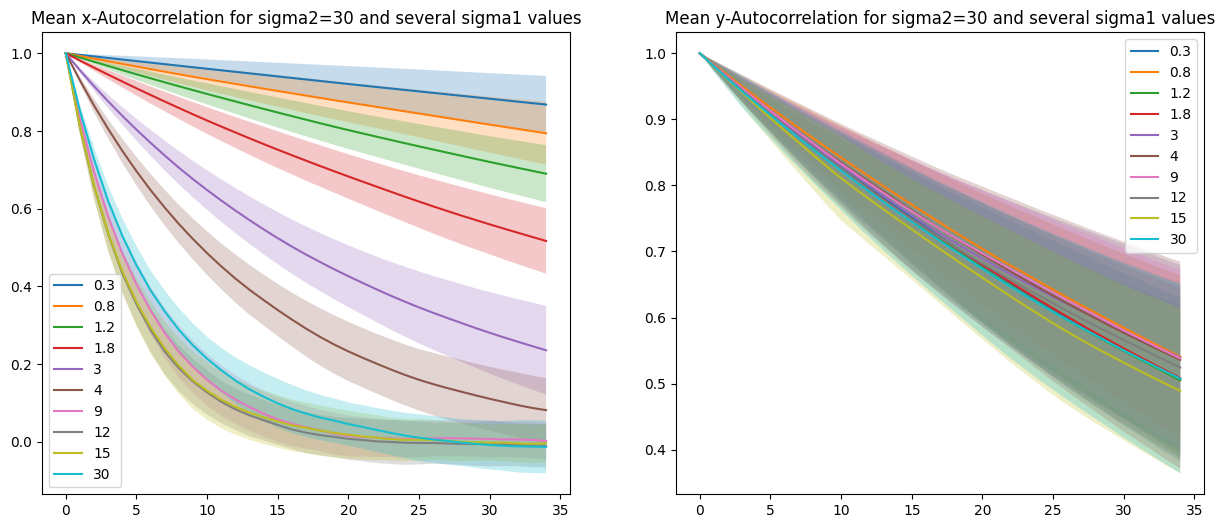

In [73]:
n=2000
a=10
sigma1=[0.3,0.8,1.2,1.8,3,4,9,12,15,30]
sigma2=0.3
chains=np.zeros((len(sigma1),50,2000,2))
for l in range(len(sigma1)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.5,n,0,0,sigma1[l],sigma2,a)

# statistics
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma1)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma1[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for sigma2={sigma2} and several sigma1 values")
for l in range(len(sigma1)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma1[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for sigma2={sigma2} and several sigma1 values")
plt.show()

n=2000
a=10
sigma1=[0.3,0.8,1.2,1.8,3,4,9,12,15,30]
sigma2=30
chains=np.zeros((len(sigma1),50,2000,2))
for l in range(len(sigma1)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.5,n,0,0,sigma1[l],sigma2,a)

# statistics
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma1)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma1[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for sigma2={sigma2} and several sigma1 values")
for l in range(len(sigma1)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma1[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for sigma2={sigma2} and several sigma1 values")
plt.show()

It seems like it does NOT depend on sigma2 !!! It is still around $\sigma_1^{*}=15$.

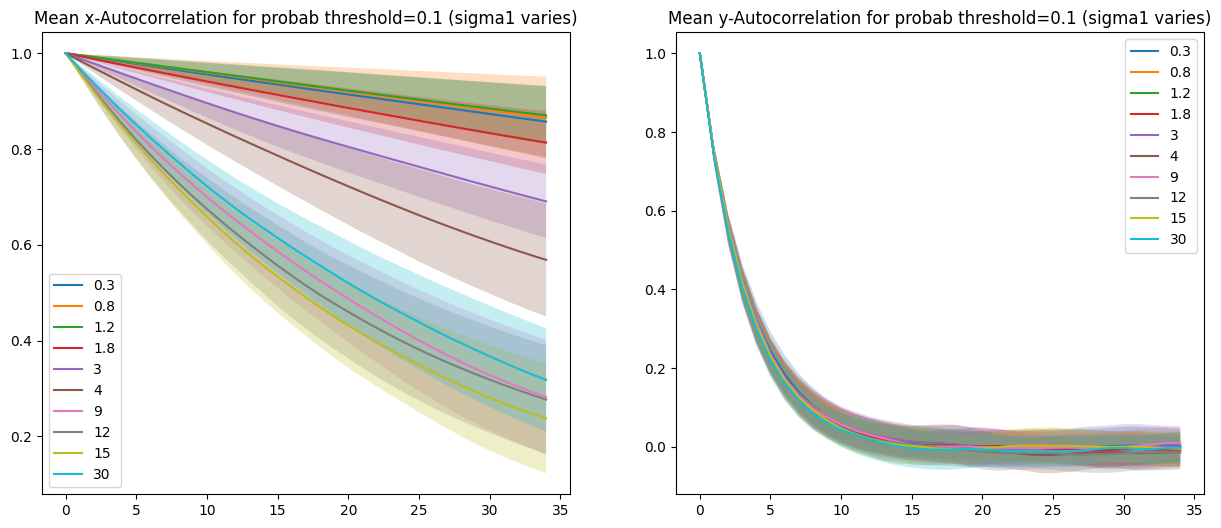

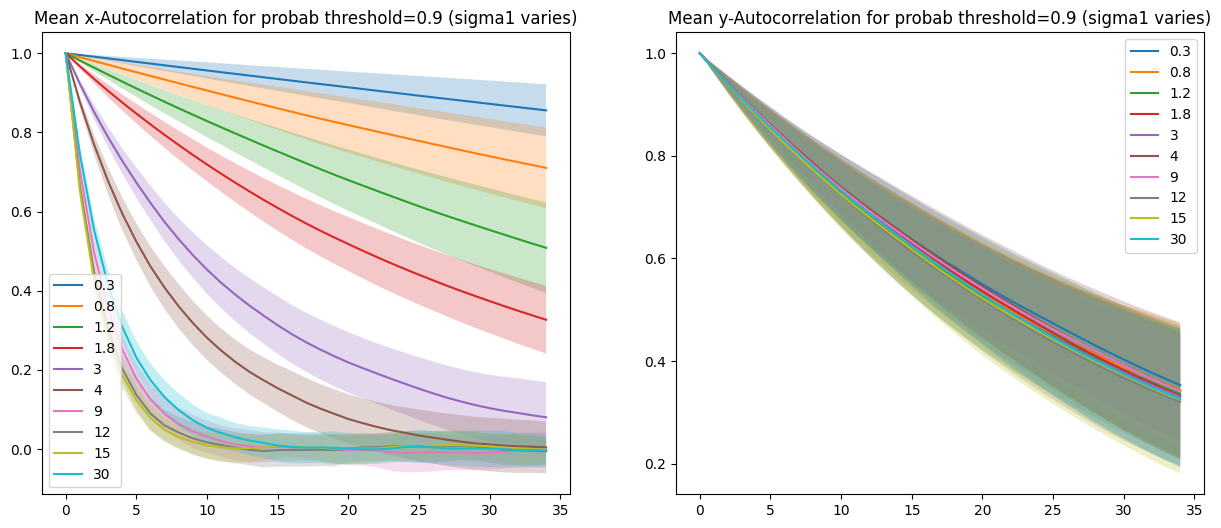

In [74]:
n=2000
a=10
sigma1=[0.3,0.8,1.2,1.8,3,4,9,12,15,30]
sigma2=3
chains=np.zeros((len(sigma1),50,2000,2))
for l in range(len(sigma1)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.1,n,0,0,sigma1[l],sigma2,a)

# statistics
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma1)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma1[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for probab threshold=0.1 (sigma1 varies)")
for l in range(len(sigma1)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma1[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for probab threshold=0.1 (sigma1 varies)")
plt.show()

n=2000
a=10
sigma1=[0.3,0.8,1.2,1.8,3,4,9,12,15,30]
sigma2=3
chains=np.zeros((len(sigma1),50,2000,2))
for l in range(len(sigma1)):
  for k in range(50):
    chains[l,k]=markov_chain_P_proba(0.9,n,0,0,sigma1[l],sigma2,a)

# statistics
acf_values=np.apply_along_axis(lambda x: acf(x=x,nlags=34),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
for l in range(len(sigma1)):
  ax1.plot(mean_acf_chain[l,:,0],label=f'{sigma1[l]}')
  ax1.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,0]-std_acf_chain[l,:,0],mean_acf_chain[l,:,0]+std_acf_chain[l,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
ax1.legend()
ax1.set_title(f"Mean x-Autocorrelation for probab threshold=0.9 (sigma1 varies)")
for l in range(len(sigma1)):
  ax2.plot(mean_acf_chain[l,:,1],label=f'{sigma1[l]}')
  ax2.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[l,:,1]-std_acf_chain[l,:,1],mean_acf_chain[l,:,1]+std_acf_chain[l,:,1],alpha=0.25)
ax2.legend()
ax2.set_title(f"Mean y-Autocorrelation for probab threshold=0.9 (sigma1 varies)")
plt.show()

It seems like it does not depend neither on probab threshold!

So now that we know $\sigma_1^{*}=15$ and $\sigma_2^{*}=1.5$, let us make the threshold vary to reach the best possible value.

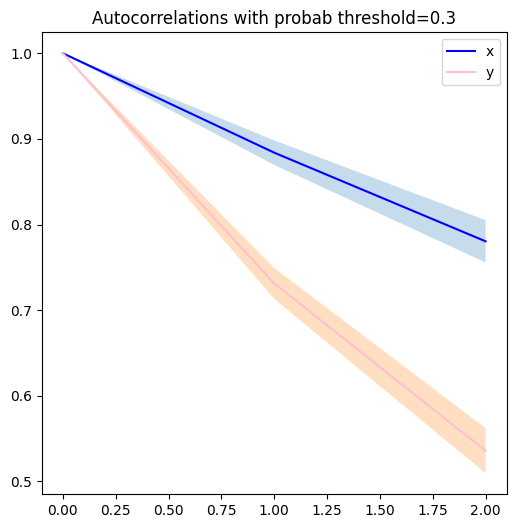

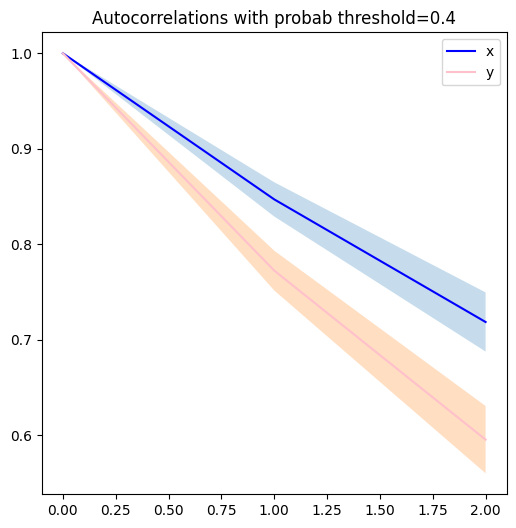

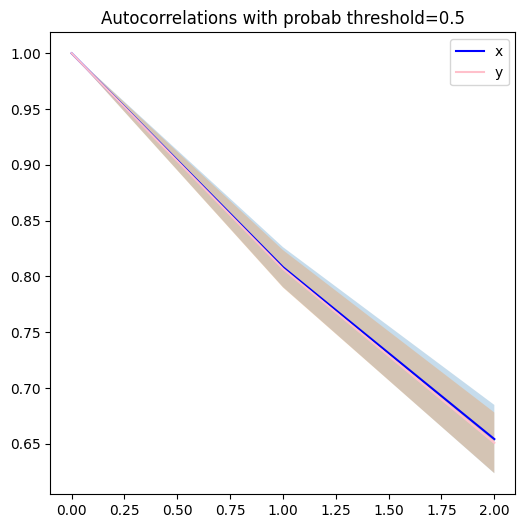

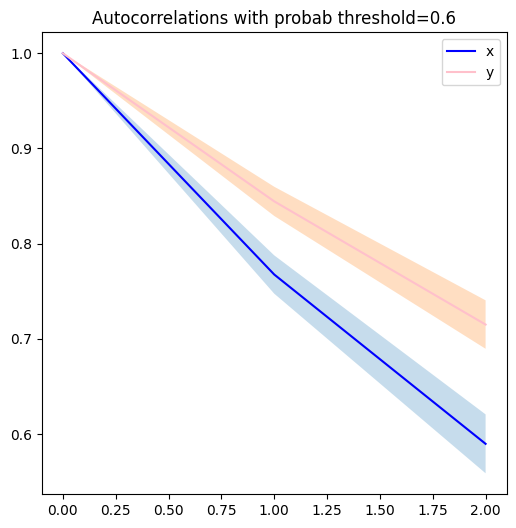

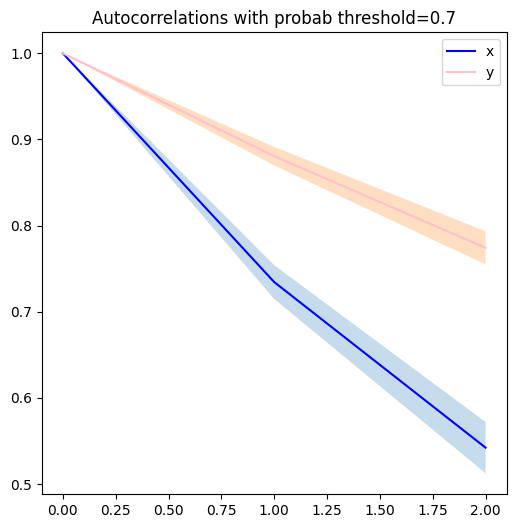

In [75]:
n=2000
sigma1=15
sigma2=1.5
a=10
thresholds=[0.3,0.4,0.5,0.6,0.7]
chains=np.zeros((len(thresholds),50,2000,2))
for k in range(len(thresholds)):
  for l in range(50):
    chains[k,l]=markov_chain_P_proba(thresholds[k],n,0,0,sigma1,sigma2,a)

acf_values=np.apply_along_axis(lambda x: acf(x,nlags=2),axis=2,arr=chains)
mean_acf_chain=np.apply_along_axis(np.mean,axis=1,arr=acf_values)
std_acf_chain=np.apply_along_axis(np.std,axis=1,arr=acf_values)

for k in range(len(thresholds)):
  fig,ax=plt.subplots(1,1,figsize=(6,6))
  ax.plot(mean_acf_chain[k,:,0],color="blue",label="x")
  ax.plot(mean_acf_chain[k,:,1],color="pink",label="y")
  ax.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[k,:,0]-std_acf_chain[k,:,0],mean_acf_chain[k,:,0]+std_acf_chain[k,:,0],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
  ax.fill_between(range(mean_acf_chain.shape[1]),mean_acf_chain[k,:,1]-std_acf_chain[k,:,1],mean_acf_chain[k,:,1]+std_acf_chain[k,:,1],alpha=0.25) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
  ax.set_title(f"Autocorrelations with probab threshold={thresholds[k]}")
  ax.legend()
  plt.show()

Finally it seems like the best threshold value is 0.5. So let's print the sampling for the best values I could find (to minimize autocorrelation).

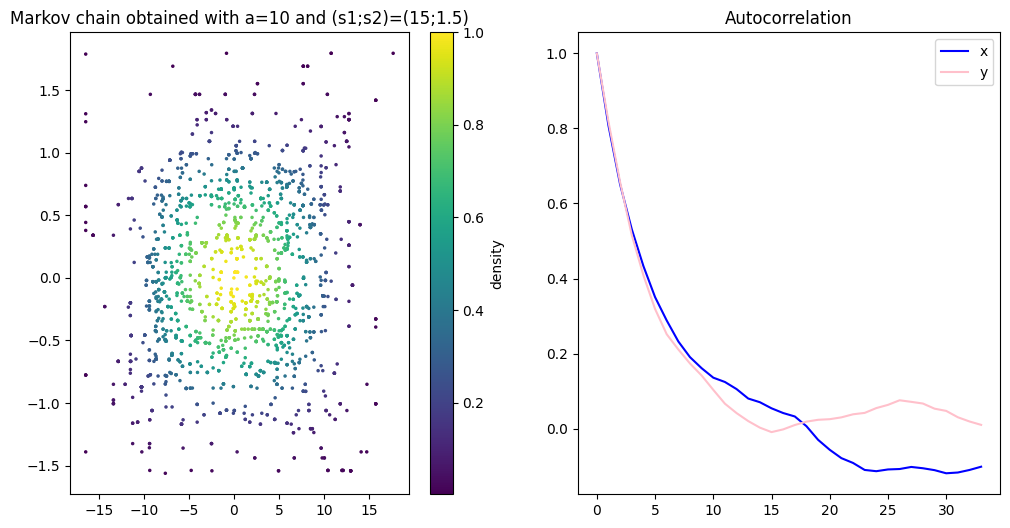

In [76]:
n=2000
sigma1=15
sigma2=1.5
a=10
chain=markov_chain_P_proba(0.5,n,0,0,sigma1,sigma2,a)
densities=f_numpy(chain[:,0],chain[:,1],a)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=2.3) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with a=10 and (s1;s2)=({sigma1};{sigma2})')
ax2.plot(acf(chain[:,0]),color="blue",label='x')
ax2.plot(acf(chain[:,1]),color="pink",label='y')
ax2.legend()
ax2.set_title("Autocorrelation")
plt.show()

After all this study made to optimize parameters to reduce the autocorrelation, I can add the two strategies mentioned in class. Firstly, we can assume that the chain isn't stationary since the very beginning, so we can decide do to a *burn-in* : the elements of the chain count for the sampling only after a threshold (on the number of iterations). Secondly, we can decide to choose a period $P$ (it is an integer) and sample from the chain at each $n=k \times P$. This process automatically reduces the autocorrelation if $P$ is high enough.

**Part B**

[Q1]

In [77]:
def gibbs_sampler(n,x_0,y_0,a):
  '''
  output : numpy array of size (n,2)
  '''
  chain=np.zeros((n,2))
  chain[0][0],chain[0][1]=x_0,y_0
  acceptancex=np.zeros(n)
  acceptancey=np.zeros(n)
  l1,l2=0,0
  for k in range(1,n): # Metropolis-Hastings loop
    dx,_=sample_P1(exp(l1))
    z=chain[k-1][0],chain[k-1][1]
    z_new=chain[k-1][0]+dx,chain[k-1][1]
    _alphax=min(alpha(z_new,z,a),1)
    acceptancex[k]=_alphax
    ux=random() # aleatoric threshold
    if ux<=_alphax: # accept
      chain[k][0],_=z_new
    else: # reject
      chain[k][0],_=z
    _,dy=sample_P2(exp(l2))
    z=chain[k][0],chain[k-1][1]
    z_new=chain[k][0],chain[k-1][1]+dy
    _alphay=min(alpha(z_new,z,a),1)
    acceptancey[k]=_alphay
    uy=random() # aleatoric threshold
    if uy<=_alphay:
      _,chain[k][1]=z_new
    else:
      _,chain[k][1]=z


    if k%50==0 and k>1:
      delta=min(0.01,k**(-0.5))
      if _alphax<0.234:
        l1-=delta
      else:
        l1+=delta
      if _alphay<0.234:
        l2-=delta
      else:
        l2+=delta

  return chain, acceptancex, acceptancey

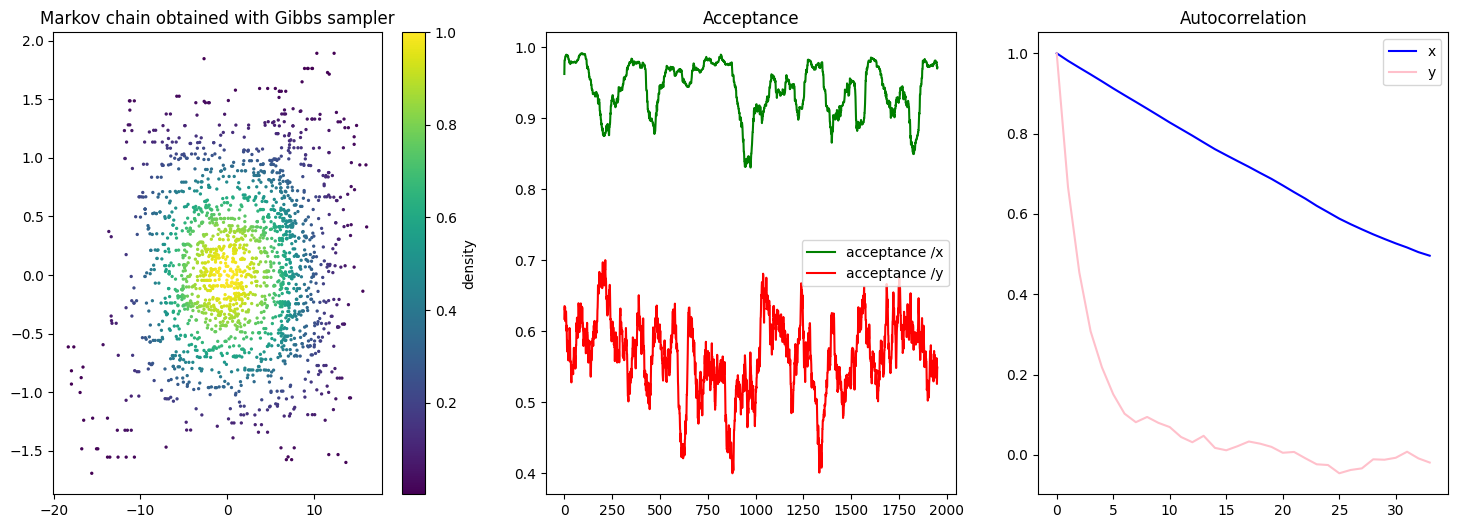

In [78]:
def f_numpy(x,y,a):  # numpy version of f function
    return np.exp(-x**2/a**2-y**2-0.25*(x**2/a**2-y**2)**2)

n=2000
a=10
chain,accx,accy=gibbs_sampler(n,0,0,a)
densities=f_numpy(chain[:,0],chain[:,1],a)

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6)) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=1.9) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with Gibbs sampler')
ax2.plot(np.convolve(accx[:2000],np.ones(50)/50,mode='valid'),color='green',label='acceptance /x') # moving average
ax2.plot(np.convolve(accy[:2000],np.ones(50)/50,mode='valid'),color='red',label='acceptance /y')
ax2.legend()
ax2.set_title(f'Acceptance')
ax3.plot(acf(chain[:,0]),color='blue',label='x') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.plot(acf(chain[:,1]),color='pink',label='y')
ax3.legend()
ax3.set_title(f'Autocorrelation')
plt.show()

First observation (compared with the method in question 1): autocorrelation decreases much faster for $y$.

It is likely that by adjusting the sigmas correctly, we can improve the result.

[Q2]

In [79]:
def banana(z,B,d):
  return np.exp(-z[0]**2/200-0.5*(z[1]+B*z[0]**2-100*B)**2-0.5*(z[2:d]**2).sum())

def step_gibbs_sampler_d(z,i,sigmai,B,d):
  u1=1-random()
  u2=1-random()
  dxi=sigmai*sqrt(-2*log(u1))*cos(2*pi*u2) # Box-Muller
  z_new=z
  z_new[i]+=dxi
  _alpha=min(banana(z_new,B,d)/(banana(z,B,d)+1e-100),1) # numerical stability
  u=random()
  if u<=_alpha:
    return z_new,_alpha
  else:
    return z,_alpha

def gibbs_sampler_d(n,B,d):
  '''
  output : numpy array of size (n,d)
  '''
  chain=np.zeros((n,d))
  l=np.zeros(d)
  sigmas=np.exp(l)
  acceptances=np.zeros((n,d))
  for k in range(1,n): # Metropolis-Hastings loop
    for i in range(d):
      chain[k],acceptances[k,i]=step_gibbs_sampler_d(chain[k-1],i,sigmas[i],B,d)
      if k%50==0 and k>1:
        delta=min(0.01,k**(-0.5))
        if acceptances[k,i]<0.234:
          l[i]-=delta
        else:
          l[i]+=delta

  return chain,acceptances

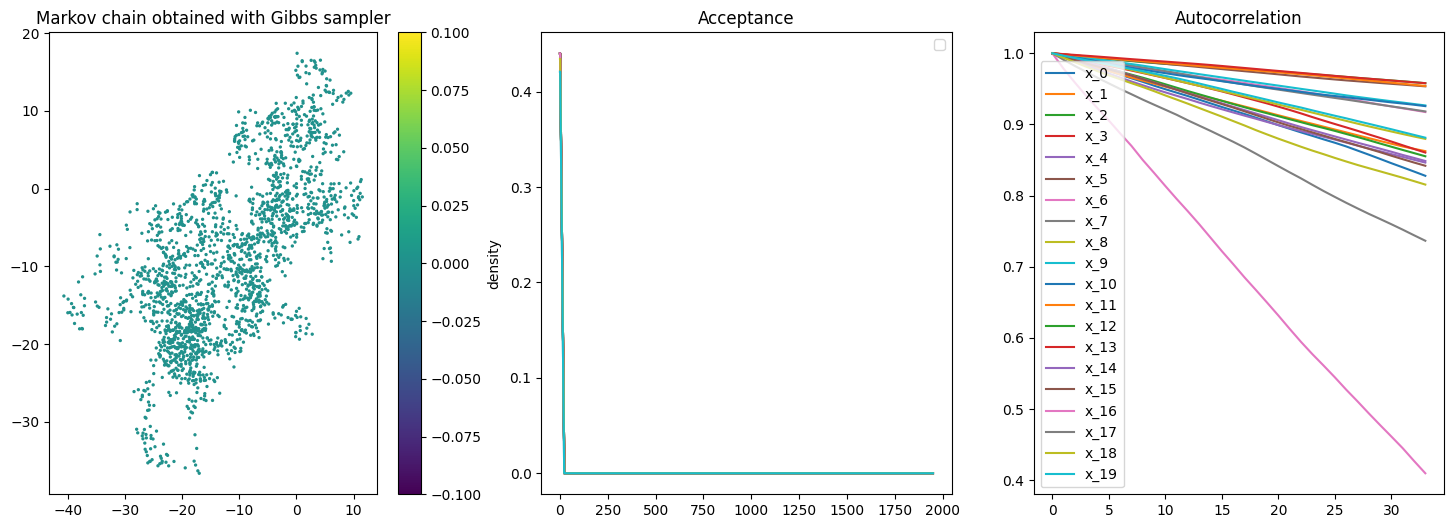

In [80]:
n=2000
d=20
B=0.1
chain,acc=gibbs_sampler_d(n,B,d)
densities=banana(chain.T,B,d)

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6)) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=1.9) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with Gibbs sampler')
for k in range(20):
  ax2.plot(np.convolve(acc[:2000,k],np.ones(50)/50,mode='valid'))
ax2.legend()
ax2.set_title(f'Acceptance')
for i in range(d):
  ax3.plot(acf(chain[:,i]),label=f'x_{i}') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.legend()
ax3.set_title(f'Autocorrelation')
plt.show()

**Exercise 2**

**Part A**

In [81]:
mu=np.array([[2.18, 5.76],
             [8.67,9.59],
             [4.24,8.48],
             [8.41,1.68],
             [3.93,8.82],
             [3.25,3.47],
             [1.70,0.50],
             [4.59,5.60],
             [6.91,5.81],
             [6.87,5.40],
             [5.41,2.65],
             [2.70,7.88],
             [4.98,3.70],
             [1.14,2.38],
             [8.33,9.50],
             [4.93,1.50],
             [1.83,0.09],
             [2.26,0.31],
             [5.54,6.86],
             [1.69,8.11]])

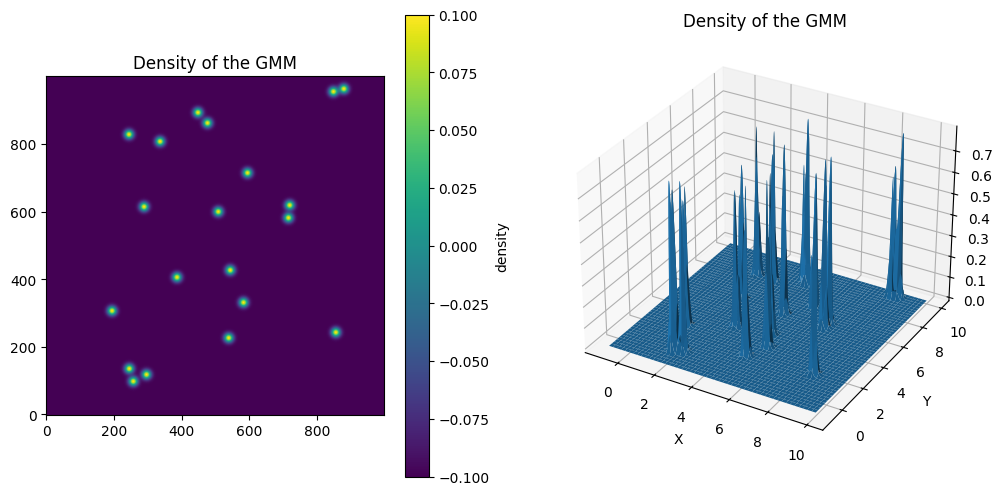

In [82]:
def mix(x):
  '''
  Goal: compute x-mu (let's call that "diff")
  Problem: x is (2,) and mu is (20,2)
  Let's write the price operation we want to make: diff(i,j,k,l)=x(j,k,l)-mu(i,j)
  Let's first expand x: (2,)->(1,2)  x_exp=x[np.newaxis,:,:,:]
  '''
  x_exp=x[np.newaxis,:]
  mu_exp=mu
  '''
  We want to compute diff(i,j)=x(0,j)-mu(i,j)
  The broadcasting is automatic
  '''
  diff=x_exp-mu_exp
  '''
  Now we have diff of dimension (20,2) and want to compute norm (20,) such that norm(i,)=sum_{j=1}^{2} diff(i,j)*diff(i,j)
  We use Einstein notation ij,ij->i
  '''
  norm=np.einsum('ij,ij->i',diff,diff)  # source: https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
  '''
  We finally want to sum but only over the first dimension
  '''
  return (np.exp(-norm/(2*0.1**2)).sum(axis=0))*0.05/(2*pi*0.1**2) # axis=0 source: https://numpy.org/doc/stable/reference/generated/numpy.sum.html

def extended_mix(x): # the goal is to make it work with meshgrid
  '''
  Goal: compute x-mu (let's call that "diff")
  Problem: x is (2,1000,1000) and mu is (20,2)
  Let's write the price operation we want to make: diff(i,j,k,l)=x(j,k,l)-mu(i,j)
  Let's first expand x: (2,1000,1000)->(1,2,1000,1000)  x_exp=x[np.newaxis,:,:,:]
  '''
  x_exp=x[np.newaxis,:,:,:]
  mu_exp=mu[:,:,np.newaxis,np.newaxis] # we also expand mu : (20,2)->(20,2,1,1)
  '''
  We want to compute diff(i,j,k,l)=x(0,j,k,l)-mu(i,j,0,0)
  The broadcasting is automatic
  '''
  diff=x_exp-mu_exp
  '''
  Now we have diff of dimension (20,2,1000,1000) and want to compute norm (20,1000,1000) such that norm(i,k,l)=sum_{j=1}^{2} diff(i,j,k,l)*diff(i,j,k,l)
  We use Einstein notation ijkl,ijkl->ikl
  '''
  norm=np.einsum('ijkl,ijkl->ikl',diff,diff)  # source: https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
  '''
  We finally want to sum but only over the first dimension
  '''
  return (np.exp(-norm/(2*0.1**2)).sum(axis=0))*0.05/(2*pi*0.1**2) # axis=0 source: https://numpy.org/doc/stable/reference/generated/numpy.sum.html


fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_subplot.html
fig.colorbar(scatter,ax=ax1,label='density')
x=np.linspace(-1,10,1000) # source: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
y=np.linspace(-1,10,1000)
xy=np.array(np.meshgrid(x,y)) # source: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
ax1.imshow(extended_mix(xy),origin='lower') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
ax1.set_title('Density of the GMM')
ax2=fig.add_subplot(122,projection='3d')
X,Y=xy
ax2.plot_surface(X,Y,extended_mix(xy)) # source: https://matplotlib.org/stable/plot_types/3D/surface3d_simple.html
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Density of the GMM")
plt.show()

In [83]:
def step_gibbs_sampler_d(z,i,sigmai):
  u1=1-random()
  u2=1-random()
  dxi=sigmai*sqrt(-2*log(u1))*cos(2*pi*u2) # Box-Muller
  z_new=z
  z_new[i]+=dxi
  _alpha=min(mix(z_new)/(mix(z)+1e-100),1) # numerical stability
  u=random()
  if u<=_alpha:
    return z_new,_alpha
  else:
    return z,_alpha

def gibbs_sampler_d(n,d):
  '''
  output : numpy array of size (n,d)
  '''
  chain=np.zeros((n,d))
  l=np.zeros(d)
  sigmas=np.exp(l)
  acceptances=np.zeros((n,d))
  for k in range(1,n): # Metropolis-Hastings loop
    for i in range(d):
      chain[k],acceptances[k,i]=step_gibbs_sampler_d(chain[k-1],i,sigmas[i])
      if k%50==0 and k>1:
        delta=min(0.01,k**(-0.5))
        if acceptances[k,i]<0.234:
          l[i]-=delta
        else:
          l[i]+=delta

  return chain,acceptances

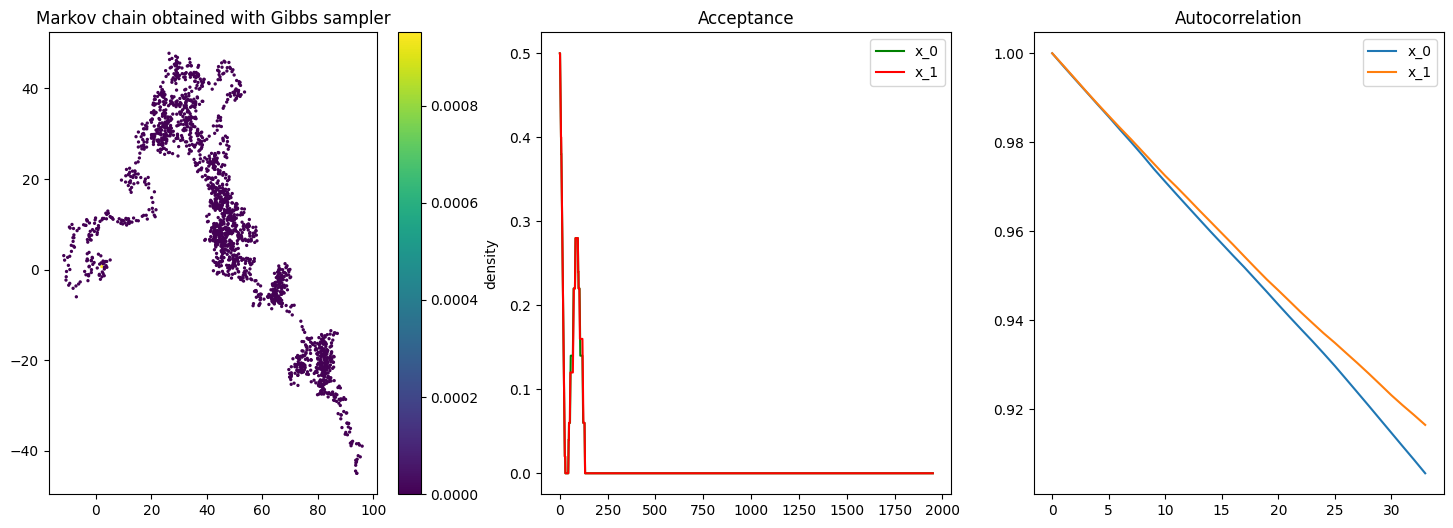

In [84]:
n=2000
d=2
chain,acc=gibbs_sampler_d(n,d)
densities=np.apply_along_axis(mix,axis=1,arr=chain) # source: https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6)) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
scatter=ax1.scatter(chain[:,0],chain[:,1],c=densities,s=1.9) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with Gibbs sampler')
ax2.plot(np.convolve(acc[:2000,0],np.ones(50)/50,mode='valid'),color='green',label='x_0') # moving average
ax2.plot(np.convolve(acc[:2000,1],np.ones(50)/50,mode='valid'),color='red',label='x_1')
ax2.legend()
ax2.set_title(f'Acceptance')
for i in range(d):
  ax3.plot(acf(chain[:,i]),label=f'x_{i}') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.legend()
ax3.set_title(f'Autocorrelation')
plt.show()

**Exercice 3**

I have done all the calculations and numbered the questions precisely in the pdf document.

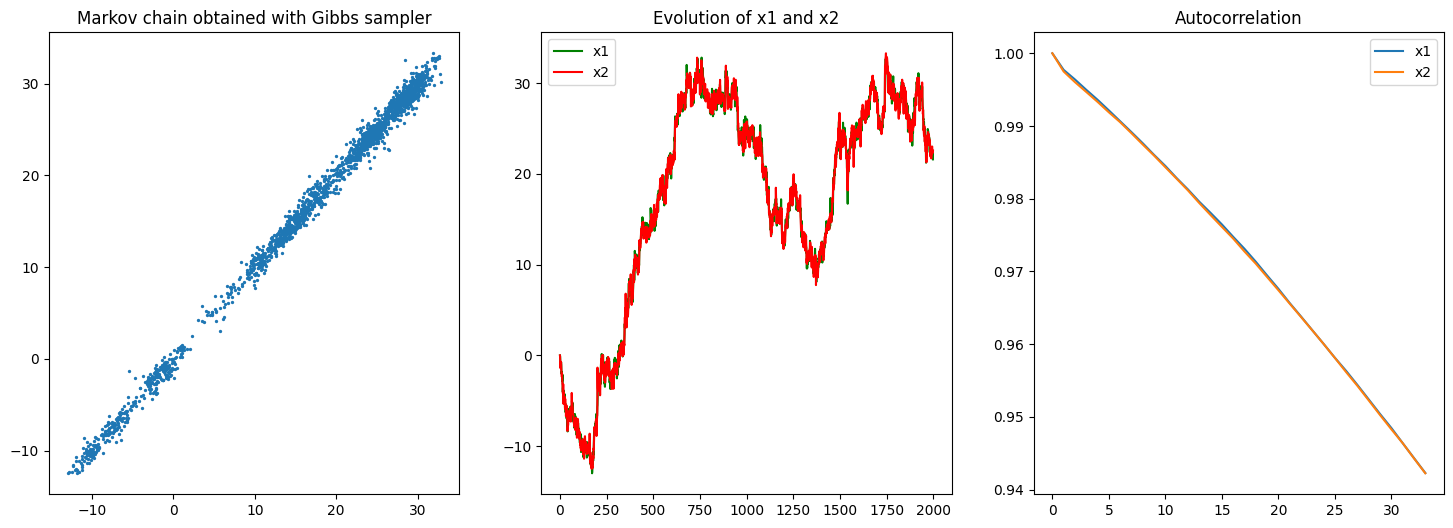

In [85]:
n=2000
alpha,beta,gamma=1,1,1
N=2
chain=np.zeros((n,5)) # n, s2,t2,m,x1,x2 ; we do it for N=2
for k in range(1,n):
  chain[k,0]=invgamma.rvs(a=1+2*alpha+N,scale=beta+0.5*((chain[k-1,3]-chain[k-1,2])**2+(chain[k-1,4]-chain[k-1,2])**2)) # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgamma.html#scipy.stats.invgamma
  chain[k,1]=invgamma.rvs(a=1+2*gamma,scale=beta)
  chain[k,2]=norm.rvs(loc=(chain[k-1,3]+chain[k-1,4])/2,scale=chain[k,0]/2) #source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
  chain[k,3],chain[k,4]=multivariate_normal.rvs(mean=np.array([chain[k,2],chain[k,2]]),cov=chain[k,0]*np.eye(2)) # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6)) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
scatter=ax1.scatter(chain[:,3],chain[:,4],s=1.9) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with Gibbs sampler')
ax2.plot(chain[:,3],color='green',label='x1')
ax2.plot(chain[:,4],color='red',label='x2')
ax2.legend()
ax2.set_title(f'Evolution of x1 and x2')
ax3.plot(acf(chain[:,3]),label=f'x1') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.plot(acf(chain[:,4]),label=f'x2') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.legend()
ax3.set_title(f'Autocorrelation')
plt.show()

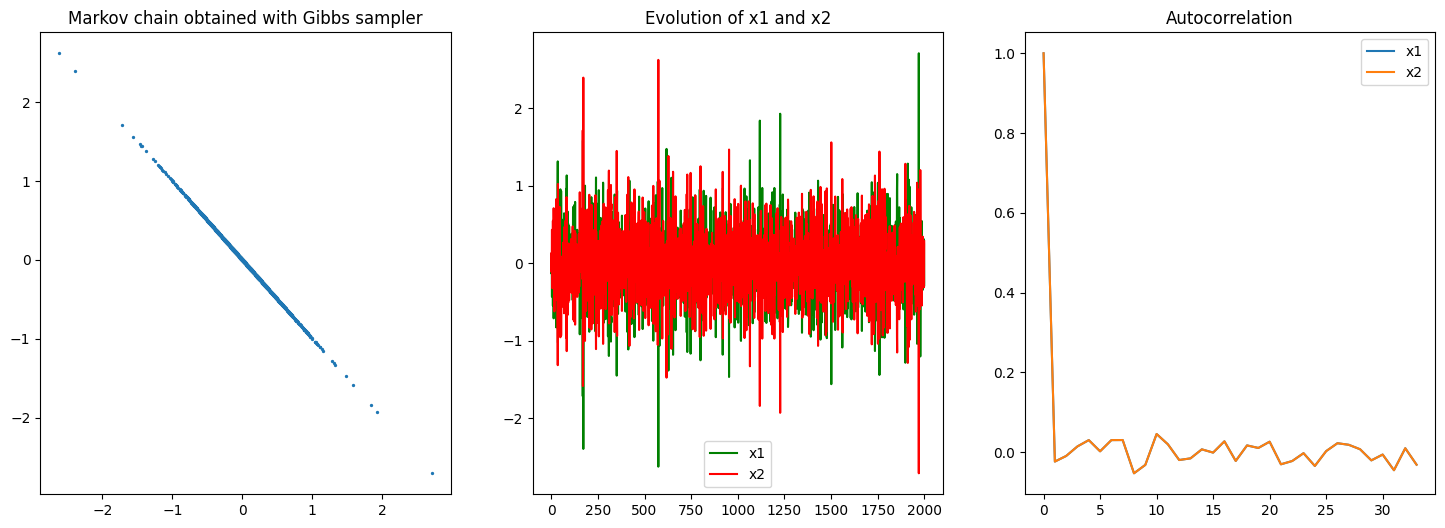

In [86]:
n=2000
alpha,beta,gamma=1,1,1
N=2
chain=np.zeros((n,5)) # n, s2,t2,m,x1,x2 ; we do it for N=2
for k in range(1,n):
  chain[k,0]=invgamma.rvs(a=1+2*alpha+N,scale=beta+0.5*((chain[k-1,3]-chain[k-1,2])**2+(chain[k-1,4]-chain[k-1,2])**2)) # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgamma.html#scipy.stats.invgamma
  chain[k,1]=invgamma.rvs(a=1+2*gamma,scale=beta)
  z=multivariate_normal.rvs(mean=np.array([0,0]),cov=chain[k,0]*np.eye(2)) # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
  mu=z.sum()/2
  chain[k,2]=mu
  chain[k,3],chain[k,4]=z-mu

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6)) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
scatter=ax1.scatter(chain[:,3],chain[:,4],s=1.9) # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#fig.colorbar(scatter,ax=ax1,label='density') # source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ax1.set_title(f'Markov chain obtained with Gibbs sampler')
ax2.plot(chain[:,3],color='green',label='x1')
ax2.plot(chain[:,4],color='red',label='x2')
ax2.legend()
ax2.set_title(f'Evolution of x1 and x2')
ax3.plot(acf(chain[:,3]),label=f'x1') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.plot(acf(chain[:,4]),label=f'x2') # source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
ax3.legend()
ax3.set_title(f'Autocorrelation')
plt.show()

Autocorrelation is much weaker. In fact, Block-Gibbs makes it possible to decorrelate samples.